## Indemand Skills Trend for Data Analysts in United States

Methodology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand


In [ ]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

In [131]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month_no'] = df['job_posted_date'].dt.month
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

monthly_job_counts = df_DA['job_posted_month_no'].value_counts()
monthly_skill_counts = df_DA.explode('job_skills').pivot_table(index='job_posted_month_no', columns= 'job_skills', aggfunc= 'size').fillna(0)

In [135]:
skill_perc = monthly_skill_counts.div(monthly_job_counts/100,axis= 0)
skill_perc.reset_index(inplace= True)
skill_perc['job_posted_month'] = pd.to_datetime(skill_perc['job_posted_month_no'], format= '%m').dt.strftime('%b')
skill_perc.set_index('job_posted_month', inplace= True)
skill_perc.drop(labels='job_posted_month_no',axis= 1, inplace= True)

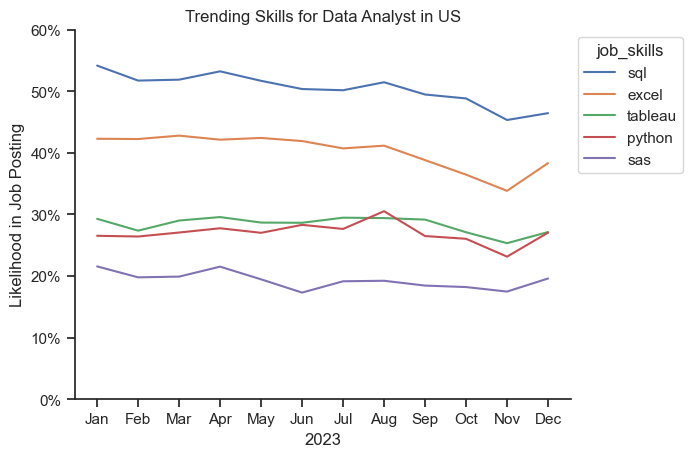

In [136]:
top_skills_list = df_DA.explode('job_skills').value_counts(subset='job_skills', ascending= False).head(5).index.to_list()

ax = sns.lineplot(
        data=skill_perc[top_skills_list]
        ,dashes= False
        )
sns.set_theme(style= 'ticks')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
sns.despine()
ax.set_title('Trending Skills for Data Analyst in US')
ax.set_xlabel(2023)
ax.set_ylabel('Likelihood in Job Posting')
ax.set_ylim(0,60)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,i: f'{x:.0f}%'))

